In [151]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns

In [152]:
def LassoGD(y, tx, initial_w, lambda_, max_iters, gamma):
    """Gradient descent algorithm for Lasso"""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute gradient and loss
        grad = compute_gradient_Lasso(y, tx, w, lambda_)
        loss = compute_loss_Lasso(y, tx, w, lambda_)
        # gradient w by descent update
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        # print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
        #     bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [153]:
def compute_loss_Lasso(y, tx, w, lambda_):
    """Compute the loss."""
    e = y - tx.dot(w)
    loss = np.sum(e**2) / 2 + lambda_ * np.sum(np.abs(w))
    return loss

In [154]:
def compute_gradient_Lasso(y, tx, w, lambda_):
    """Compute the gradient."""
    e = y - tx.dot(w)
    grad = -tx.T.dot(e) + lambda_ * np.sign(w)
    return grad

In [155]:
def RidgeGD(y, tx, initial_w, lambda_, max_iters, gamma):
    """Gradient descent algorithm for Ridge"""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute gradient and loss
        grad = compute_gradient_Ridge(y, tx, w, lambda_)
        loss = compute_loss_Ridge(y, tx, w, lambda_)
        # gradient w by descent update
        print("grad = ",grad)
        print("gamma = ",gamma)
        #convert tuple to list
        
        #multiply each element of the gradient by gamma
    
        w = w - grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        # print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
        #     bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [156]:
def compute_gradient_Ridge(y, tx, w, lambda_):
    """Compute the gradient."""
    e = y - tx.dot(w)
    grad = -tx.T.dot(e) + lambda_ * w
    return grad

In [157]:
def compute_loss_Ridge(y, tx, w, lambda_):
    """Compute the loss."""
    e = y - tx.dot(w)
    loss = np.sum(e**2) / 2 + lambda_ * np.sum(w**2)
    return loss

In [158]:
def ElasticNetGD(y, tx, initial_w, lambda_, max_iters, gamma, alpha):
    """Gradient descent algorithm for Elastic Net"""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute gradient and loss
        grad = compute_gradient_ElasticNet(y, tx, w, lambda_, alpha)
        loss = compute_loss_ElasticNet(y, tx, w, lambda_, alpha)
        # gradient w by descent update
        
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        # print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
        #     bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [159]:
def compute_loss_ElasticNet(y, tx, w, lambda_, alpha):
    """Compute the loss."""
    e = y - tx.dot(w)
    loss = np.sum(e**2) / 2 + lambda_ * (alpha * np.sum(np.abs(w)) + (1 - alpha) * np.sum(w**2)/2)
    return loss

In [160]:
def compute_gradient_ElasticNet(y, tx, w, lambda_, alpha):
    """Compute the gradient."""
    e = y - tx.dot(w)
    grad = -tx.T.dot(e) + lambda_ * (alpha * np.sign(w) + (1 - alpha) * w)
    return grad

In [161]:
def crossValidate(y, tx, k_fold, lambda_, max_iters, gamma, alpha):
    """ returns losses for each regularisation
    i.e Lasso, Ridge, Elastic Net
    """
    losses = []
    weights = []
    # for i in range(k_fold):
    #     # split data into training and test set
    #     y_train = y[i*len(y)//k_fold:(i+1)*len(y)//k_fold]
    #     y_test_1 = y[:i*len(y)//k_fold] 
    #     y_test_2 = y[(i+1)*len(y)//k_fold:]
    #     y_test = np.concatenate((y_test_1, y_test_2))
    #     # y_train, y_test = y[i*len(y)//k_fold:(i+1)*len(y)//k_fold], y[:i*len(y)//k_fold] + y[(i+1)*len(y)//k_fold:]
    #     # tx_train, tx_test = tx[i*len(tx)//k_fold:(i+1)*len(tx)//k_fold], tx[:i*len(tx)//k_fold] + tx[(i+1)*len(tx)//k_fold:]
    #     tx_train = tx[i*len(tx)//k_fold:(i+1)*len(tx)//k_fold]
    #     tx_test_1 = tx[:i*len(tx)//k_fold]
    #     tx_test_2 = tx[(i+1)*len(tx)//k_fold:]
    #     tx_test = np.concatenate((tx_test_1, tx_test_2))
        
    #     #choose a gamma
    #     #initilize initial weights
    #     #print(tx_train)
    #     initial_w = np.zeros(tx_train.shape)
    #     #print(initial_w)
    #     # train model and predict
    #     losses_lasso, ws_lasso = LassoGD(y_train, tx_train,initial_w, lambda_, max_iters, gamma)
    #     losses_ridge, ws_ridge = RidgeGD(y_train, tx_train,initial_w, lambda_, max_iters, gamma)
    #     losses_elastic, ws_elastic = ElasticNetGD(y_train, tx_train, initial_w,lambda_, max_iters, gamma, alpha)
    #     # append losses
    #     losses.append(losses_lasso)
    #     losses.append(losses_ridge)
    #     losses.append(losses_elastic)
    #     # append weights
    #     weights.append(ws_lasso)
    #     weights.append(ws_ridge)
    #     weights.append(ws_elastic)

    # return losses, weights
    for i in range(k_fold):
        
        
        #choose a gamma
        #initilize initial weights
        #print(tx_train)
        initial_w = np.zeros(tx.shape)
        #print(initial_w)
        # train model and predict
        losses_lasso, ws_lasso = LassoGD(y, tx,initial_w, lambda_, max_iters, gamma)
        losses_ridge, ws_ridge = RidgeGD(y, tx,initial_w, lambda_, max_iters, gamma)
        losses_elastic, ws_elastic = ElasticNetGD(y, tx, initial_w,lambda_, max_iters, gamma, alpha)
        # append losses
        losses.append(losses_lasso)
        losses.append(losses_ridge)
        losses.append(losses_elastic)
        # append weights
        weights.append(ws_lasso)
        weights.append(ws_ridge)
        weights.append(ws_elastic)

    return losses, weights


In [162]:
def augment (X, d, aug_intercept = False):
    if aug_intercept:
        X = np.c_[np.ones(len(X)), X]
    for i in range(2,d+1):
        X = np.c_[X, np.power(X[:,1],i)]

    return X

In [163]:

n = 60
x = np.random.uniform(0, 10, n)

# a be any real number
a = 20
b = 10
e = np.random.normal(0, 1, n)*5

y = a * x + b + e

X_aug = augment(x, 10, aug_intercept = True)
for i in range(1,len(X_aug[0])):
    X_aug[:,i] = (X_aug[:,i] - X_aug[:,i].mean()) / X_aug[:,i].std()

print(X_aug[:10])


[[ 1.         -0.97835808 -0.9045383  -0.79418213 -0.70408709 -0.63616362
  -0.58460238 -0.54447068 -0.51242064 -0.48623176 -0.46439963]
 [ 1.          1.1776693   1.18423905  1.10178288  0.97913727  0.84257679
   0.70627926  0.57739884  0.45923555  0.3530047   0.25879407]
 [ 1.         -1.07202352 -0.93532261 -0.80256216 -0.70613831 -0.63663363
  -0.58470549 -0.54449263 -0.51242521 -0.4862327  -0.46439982]
 [ 1.          0.98777962  0.8940365   0.73509469  0.56324632  0.40178423
   0.25974983  0.1392501   0.03931712 -0.04223093 -0.10792201]
 [ 1.         -1.37904007 -1.00122345 -0.8148982  -0.70830727 -0.63700345
  -0.58476756 -0.54450296 -0.51242692 -0.48623298 -0.46439987]
 [ 1.          0.4410933   0.17313336 -0.05420226 -0.2156726  -0.31945672
  -0.38108647 -0.41439645 -0.4295956  -0.43364348 -0.43108764]
 [ 1.          0.42082879  0.14968017 -0.0766352  -0.2349248  -0.33489042
  -0.39290719 -0.42316239 -0.43594231 -0.43815448 -0.43424704]
 [ 1.         -0.93586503 -0.88892609 -0.

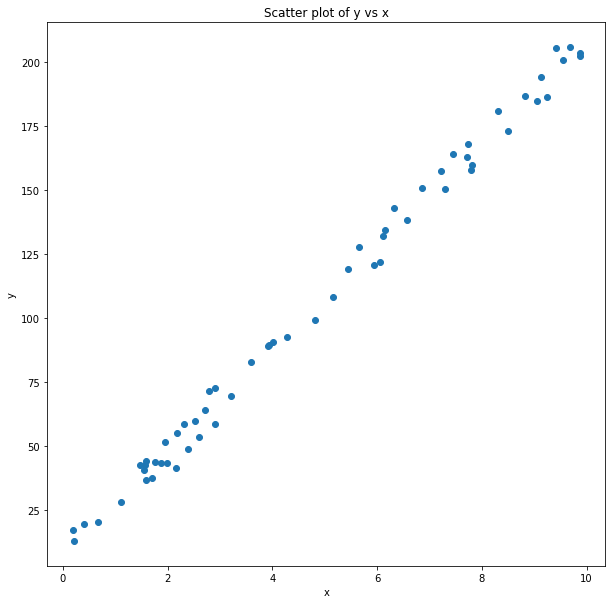

In [164]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))


plt.grid(False)
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of y vs x")
plt.show()

In [165]:
losses, weights = crossValidate(y, x, 6, 0.1, 10000, 0.000000001, 0.5)

grad =  [40715.8546752 40715.8546752 40715.8546752 40715.8546752 40715.8546752
 40715.8546752 40715.8546752 40715.8546752 40715.8546752 40715.8546752
 40715.8546752 40715.8546752 40715.8546752 40715.8546752 40715.8546752
 40715.8546752 40715.8546752 40715.8546752 40715.8546752 40715.8546752
 40715.8546752 40715.8546752 40715.8546752 40715.8546752 40715.8546752
 40715.8546752 40715.8546752 40715.8546752 40715.8546752 40715.8546752
 40715.8546752 40715.8546752 40715.8546752 40715.8546752 40715.8546752
 40715.8546752 40715.8546752 40715.8546752 40715.8546752 40715.8546752
 40715.8546752 40715.8546752 40715.8546752 40715.8546752 40715.8546752
 40715.8546752 40715.8546752 40715.8546752 40715.8546752 40715.8546752
 40715.8546752 40715.8546752 40715.8546752 40715.8546752 40715.8546752
 40715.8546752 40715.8546752 40715.8546752 40715.8546752 40715.8546752]
gamma =  1e-09
grad =  [3.3643483e+09 3.3643483e+09 3.3643483e+09 3.3643483e+09 3.3643483e+09
 3.3643483e+09 3.3643483e+09 3.3643483e+09 3.

<ipython-input-157-d75910eac88a>:4: RuntimeWarning: overflow encountered in square
  loss = np.sum(e**2) / 2 + lambda_ * np.sum(w**2)



gamma =  1e-09
grad =  [inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf]
gamma =  1e-09
grad =  [inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf]
gamma =  1e-09
grad =  [inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf]
gamma =  1e-09
grad =  [inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf i